In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Continuous prediction

###### Data Description

In total there are 21 columns in the data, which are described below:

 - ID: Numerical correlation that distinguishes each of the houses sold.
 - Date: Date on which the house was sold.
 - Price: Sale price of the house (in US dollars).
 - Bedrooms: Number of rooms in the house.
 - Bathrooms: Number of bathrooms available in the house, where a value of 0.5 represents a bathroom with a toilet but if
 - Sqft_living15: The square feet of living space of the interior house for the 15 nearest neighbors.
 - Sqft_lot15: The square meters of the land of the 15 closest neighbors.n shower.
 - Sqft_living: Number of square feet of living space in the house.
 - Sqft_lot: Square feet of the total space of the land where the house is located.
 - Floors: Number of floors in the house.
 - Waterfront: Variable that indicates the presence or absence of a sea view in the house.
 - View: Index from 0 to 4 that indicates how good the view of the property is.
 - Condition: Index from 1 to 5 to rate the current condition of the house.
 - Grade: Index from 1 to 13, which qualifies the level of construction quality of the house.
 - Sqft_above: Number of square feet of space inside the house. which is above ground level.
 - Sqft_basement: The square feet of the interior space of the house. which is below ground level.
 - Yr_built: The year the house was built.
 - Yr_renovated: Year of the last renovation of the house.
 - Zipcode: Postal code of the area where the house is located.
 - Lat: Latitude of the house location.
 - Long: Length of the 15 nearest neighbors.

In [2]:
data = pd.read_csv("regresion - House Price.csv",delimiter = ";")
data.head()

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
0,7129300520,20141013T000000,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,0,1955,59,0,0,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1,400,1951,63,1991,1,23,98125,47.7210,-122.319
2,5631500400,20150225T000000,2015,180000.0,2,1.00,770,10000,2720,8062,...,0,0,1933,82,0,0,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,2014,604000.0,4,3.00,1960,5000,1360,5000,...,1,910,1965,49,0,0,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,2015,510000.0,3,2.00,1680,8080,1800,7503,...,0,0,1987,28,0,0,0,98074,47.6168,-122.045


## Simple Lineal Regreassion

### Cleaning

1. Check nan

In [3]:
data.isna().sum() # no hay datos nulos, por lo que no hay que trabajar los nulos

id               0
date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_living15    0
sqft_lot15       0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
bsmt             0
sqft_bsmt        0
yr_built         0
age              0
yr_renovated     0
renov            0
age_renov        0
zipcode          0
lat              0
long             0
dtype: int64

2. format date

In [4]:
data["date"] = pd.to_datetime(data["date"])
data.head(2)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,0,1955,59,0,0,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1,400,1951,63,1991,1,23,98125,47.7210,-122.319


### Exploratory analyssis

3. Graph correlation matrix. What are the variables that do not influence the price (correlation less than 0.2)?

 Show values ​​in array with 2 decimal places

In [5]:
correlation_matrix = data.corr().round(2)

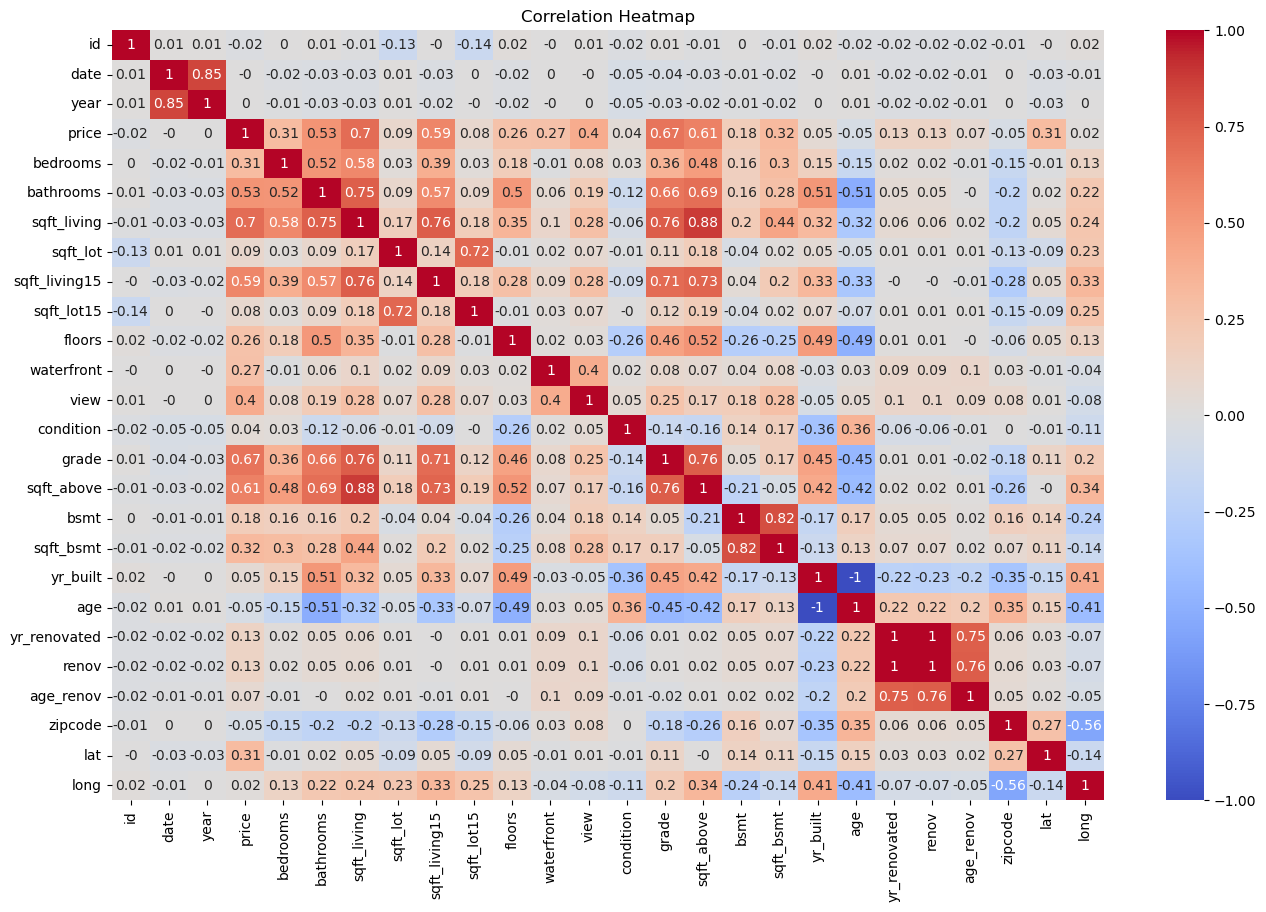

In [6]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
filtro = (correlation_matrix["price"] < 0.2) & (correlation_matrix["price"] > -0.2)
relevantes = correlation_matrix.loc[filtro,:]
relevantes

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
id,1.00,0.01,0.01,-0.02,0.00,0.01,-0.01,-0.13,-0.00,-0.14,...,0.00,-0.01,0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.00,0.02
date,0.01,1.00,0.85,-0.00,-0.02,-0.03,-0.03,0.01,-0.03,0.00,...,-0.01,-0.02,-0.00,0.01,-0.02,-0.02,-0.01,0.00,-0.03,-0.01
year,0.01,0.85,1.00,0.00,-0.01,-0.03,-0.03,0.01,-0.02,-0.00,...,-0.01,-0.02,0.00,0.01,-0.02,-0.02,-0.01,0.00,-0.03,0.00
sqft_lot,-0.13,0.01,0.01,0.09,0.03,0.09,0.17,1.00,0.14,0.72,...,-0.04,0.02,0.05,-0.05,0.01,0.01,0.01,-0.13,-0.09,0.23
sqft_lot15,-0.14,0.00,-0.00,0.08,0.03,0.09,0.18,0.72,0.18,1.00,...,-0.04,0.02,0.07,-0.07,0.01,0.01,0.01,-0.15,-0.09,0.25
condition,-0.02,-0.05,-0.05,0.04,0.03,-0.12,-0.06,-0.01,-0.09,-0.00,...,0.14,0.17,-0.36,0.36,-0.06,-0.06,-0.01,0.00,-0.01,-0.11
bsmt,0.00,-0.01,-0.01,0.18,0.16,0.16,0.20,-0.04,0.04,-0.04,...,1.00,0.82,-0.17,0.17,0.05,0.05,0.02,0.16,0.14,-0.24
yr_built,0.02,-0.00,0.00,0.05,0.15,0.51,0.32,0.05,0.33,0.07,...,-0.17,-0.13,1.00,-1.00,-0.22,-0.23,-0.20,-0.35,-0.15,0.41
age,-0.02,0.01,0.01,-0.05,-0.15,-0.51,-0.32,-0.05,-0.33,-0.07,...,0.17,0.13,-1.00,1.00,0.22,0.22,0.20,0.35,0.15,-0.41
yr_renovated,-0.02,-0.02,-0.02,0.13,0.02,0.05,0.06,0.01,-0.00,0.01,...,0.05,0.07,-0.22,0.22,1.00,1.00,0.75,0.06,0.03,-0.07


4. Create the correlation matrix excluding these insignificant variables

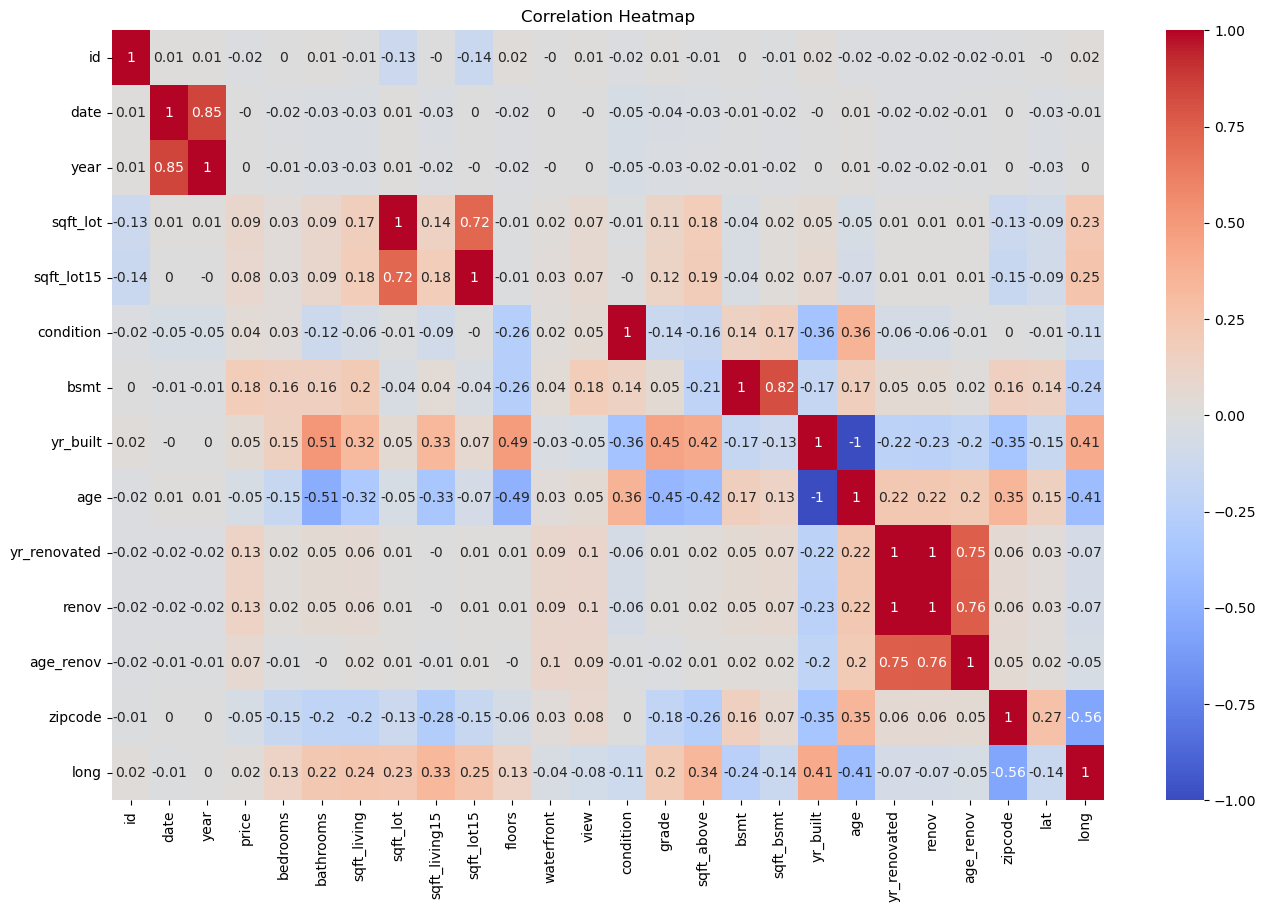

In [8]:
plt.figure(figsize=(16, 10))
sns.heatmap(relevantes, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

5. Make a scatter plot of the three variables with the highest correlation coefficient as a function of price.

 Note: in case two graphs look similar, check the correlation coefficient between both graphs

In [9]:
relevantes.sort_values("price", ascending = False).iloc[1:4,0].index # 3 columnas más relevantes

Index(['yr_renovated', 'renov', 'sqft_lot'], dtype='object')

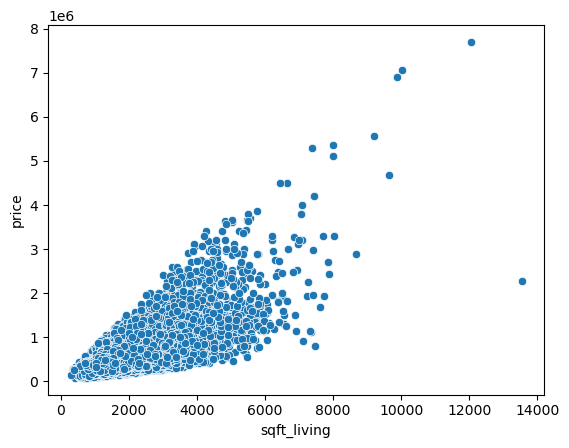

In [10]:
sns.scatterplot(x= data.sqft_living, y = data.price)
plt.show()

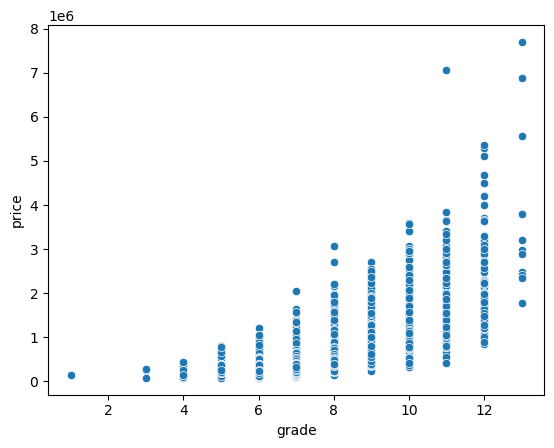

In [11]:
sns.scatterplot(x= data.grade, y = data.price)
plt.show()

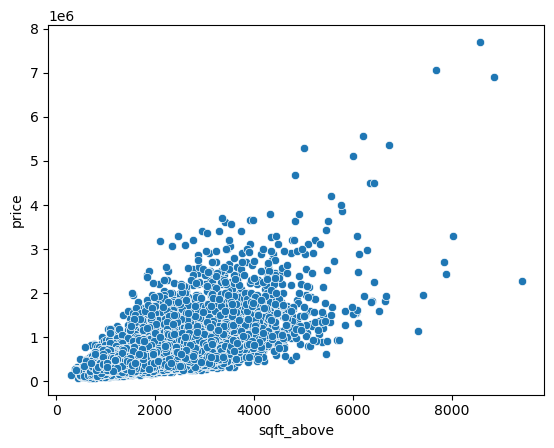

In [12]:
sns.scatterplot(x= data.sqft_above, y = data.price)
plt.show()

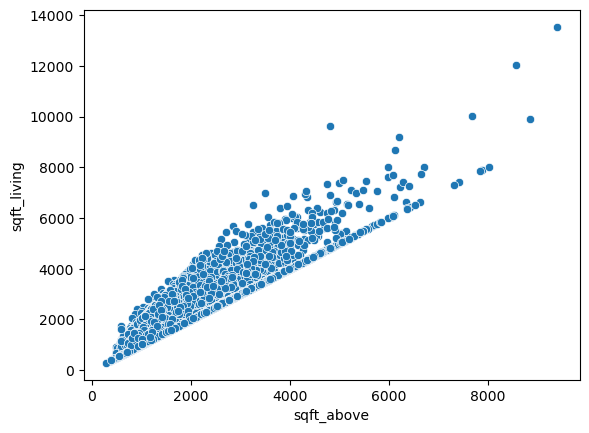

In [13]:
sns.scatterplot(x= data.sqft_above, y = data.sqft_living)
plt.show()

### Prediction

6. Perform linear regression to predict property prices with sqft_living

In [14]:
lm = smf.ols(formula="price~sqft_living", data = data).fit()

7. What is the R^2 of the model?

In [15]:
lm.rsquared

0.49286538652201417

8. Add to the table the column with price predictions based on sqft_living

In [16]:
data["price_pred"] = lm.predict(data["sqft_living"])
data.head(2)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,price_pred
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,400,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585


9. Graph the price based on sqft_living (scatter) and the price prediction based on sqft_living (line) on the same chart

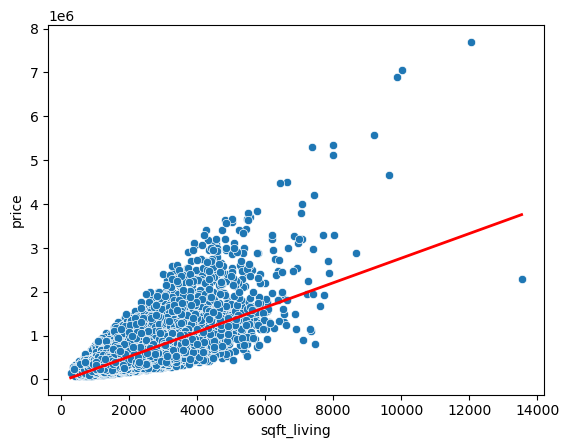

In [17]:
sns.scatterplot(x = data["sqft_living"], y =data["price"])

sns.lineplot(x = data["sqft_living"], y = data["price_pred"], c="red", linewidth = 2)
plt.show()

10. Add a column that is the prediction of the price calculated manually from the model parameters

In [18]:
lm.params

Intercept     -43867.601534
sqft_living      280.806690
dtype: float64

In [19]:
b0 = lm.params.iloc[0]
b1 = lm.params.iloc[1]

data["price_pred_artesanal"] = b0 + b1 *data["sqft_living"]
data.head(5)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,price_pred,price_pred_artesanal
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583,287484.292583
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585,677805.591585
2,5631500400,2015-02-25,2015,180000.0,2,1.00,770,10000,2720,8062,...,1933,82,0,0,0,98028,47.7379,-122.233,172353.549712,172353.549712
3,2487200875,2014-12-09,2014,604000.0,4,3.00,1960,5000,1360,5000,...,1965,49,0,0,0,98136,47.5208,-122.393,506513.510728,506513.510728
4,1954400510,2015-02-18,2015,510000.0,3,2.00,1680,8080,1800,7503,...,1987,28,0,0,0,98074,47.6168,-122.045,427887.637548,427887.637548


11. Calculate the mean square error of the model

In [20]:
data["error_cuadratico"] = (data["sqft_living"]-data["price_pred_artesanal"])**2

Suma_error_cuadratico = sum(data["error_cuadratico"])

Error_cuadratico_medio = np.sqrt(Suma_error_cuadratico/(len(data)-2)) 

Error_cuadratico_medio

596343.5675829962

12. Calculate the average error of the model

In [21]:
sales_m = np.mean(data["price"])
error = Error_cuadratico_medio / sales_m 

print(f"El error promedio es de un {round(error*100)}%")

El error promedio es de un 110%


## Multiple Linear Regression

In [22]:
data = pd.read_csv("regresion - House Price.csv",delimiter = ";")
data["date"] = pd.to_datetime(data["date"])

### Split data into testing and training

1. Using scikit-learn, divide the data into 75% training and the rest testing. Starting from the dataframe with the columns detected as relevant in the exploratory analysis

In [33]:
data.columns

Index(['id', 'date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_living15', 'sqft_lot15', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'bsmt', 'sqft_bsmt',
       'yr_built', 'age', 'yr_renovated', 'renov', 'age_renov', 'zipcode',
       'lat', 'long'],
      dtype='object')

In [34]:
filtro = (data.corr()["price"]>0.2) | (data.corr()["price"]<-0.2)

In [35]:
data_bis = data.loc[:,filtro]

In [36]:
from sklearn.model_selection import train_test_split

X = data_bis.loc[:, data_bis.columns != "price"]
y = data_bis.loc[:, "price"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75, 
    test_size = 0.25
)

In [38]:
X_train.shape

(16209, 11)

In [39]:
X_test.shape

(5404, 11)

In [40]:
y_test.shape, y_train.shape

((5404,), (16209,))

### Multicollinearity Analysis

2. Calculate the determinant of the correlation matrix and determine whether there is multicollinearity

In [41]:
# the correct thing would be to build a new correlation matrix with training data,
# but the result will be the same

np.linalg.det(X_train.corr()) # 0

-1.1384723338426419e-16

3. Detect variables to discard with the p-value (do not eliminate them)

In [45]:
modelo = smf.ols(
    formula = "price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_bsmt + bedrooms + lat + waterfront + floors", 
    data = data_bis
).fit()
modelo.pvalues<0.05

Intercept         True
sqft_living       True
grade             True
sqft_above        True
sqft_living15    False
bathrooms        False
view              True
sqft_bsmt         True
bedrooms          True
lat               True
waterfront        True
floors            True
dtype: bool

In [48]:
col_relevantes = modelo.pvalues[modelo.pvalues<0.05]
col_relevantes

Intercept       0.000000e+00
sqft_living     0.000000e+00
grade          1.849367e-290
sqft_above     1.216251e-168
view           1.304610e-193
sqft_bsmt      8.155080e-121
bedrooms        4.075151e-38
lat             0.000000e+00
waterfront     8.851255e-227
floors          1.381682e-15
dtype: float64

In [49]:
# busco los nombres
col_relevantes.index

Index(['Intercept', 'sqft_living', 'grade', 'sqft_above', 'view', 'sqft_bsmt',
       'bedrooms', 'lat', 'waterfront', 'floors'],
      dtype='object')

4. Analyze VIF of relevant variables

In [54]:
from sklearn.linear_model import LinearRegression

In [51]:
# busco columnas importantes
col_relevantes.index # tengo que eliminar Intercept porque no es una columna

Index(['Intercept', 'sqft_living', 'grade', 'sqft_above', 'view', 'sqft_bsmt',
       'bedrooms', 'lat', 'waterfront', 'floors'],
      dtype='object')

In [52]:
columnas = col_relevantes.index[col_relevantes.index != "Intercept"]
columnas

Index(['sqft_living', 'grade', 'sqft_above', 'view', 'sqft_bsmt', 'bedrooms',
       'lat', 'waterfront', 'floors'],
      dtype='object')

In [58]:
# Creo un bucle para guardar el dato de todos
vif_acum = {}

for i in columnas:

    x = X_train.loc[:,X_train.columns != i]
    y = X_train.loc[:,i]
    
    lm = LinearRegression()
    lm.fit(x, y)
    r2 = lm.score(x, y)
    
    vif = (1/(1-r2))
    vif_acum[i] = vif

vif_acum

C:\Users\ignac\AppData\Local\Temp\ipykernel_47072\1296402065.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  vif = (1/(1-r2))
C:\Users\ignac\AppData\Local\Temp\ipykernel_47072\1296402065.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  vif = (1/(1-r2))
C:\Users\ignac\AppData\Local\Temp\ipykernel_47072\1296402065.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  vif = (1/(1-r2))


{'sqft_living': inf,
 'grade': 3.228650219713761,
 'sqft_above': inf,
 'view': 1.374588765184869,
 'sqft_bsmt': inf,
 'bedrooms': 1.6105270189987482,
 'lat': 1.0456891730958804,
 'waterfront': 1.1976532859181737,
 'floors': 1.839296019111523}

There are 3 variables with infinite VIF, it means they are 100% correlated.

5. Eliminate variables with VIF greater than 5 and recalculate. Delete variable one at a time and check if the VIF of the rest is corrected before eliminating another

In [59]:
# voy a eliminar sqft_above
columnas = columnas[columnas != "sqft_above"]
columnas

Index(['sqft_living', 'grade', 'view', 'sqft_bsmt', 'bedrooms', 'lat',
       'waterfront', 'floors'],
      dtype='object')

In [60]:
# Creo un bucle para guardar el dato de todos

X_train_ok = X_train.loc[:,columnas]
vif_acum = {}

for i in columnas:

    x = X_train_ok.loc[:,X_train_ok.columns != i]
    y = X_train_ok.loc[:,i]
    
    lm = LinearRegression()
    lm.fit(x, y)
    r2 = lm.score(x, y)
    
    vif = (1/(1-r2))
    vif_acum[i] = vif

vif_acum

{'sqft_living': 4.169415219428331,
 'grade': 2.8660789476341444,
 'view': 1.3548537034554302,
 'sqft_bsmt': 1.7543835789210596,
 'bedrooms': 1.5526981610407344,
 'lat': 1.0404543738293934,
 'waterfront': 1.1958739169025145,
 'floors': 1.5538716883704615}

I see that the multicollinearity problem has been solved, so I'm going to select the variables. If there is still a VIF greater than 5, you should eliminate another

6. Select variables to use in the model with SVR and RFE (Test only with 8 and 9 variables because it takes a long time). Then calculate the R^2 of the model fitted with the training data, and evaluate it on the testing data.

In [71]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1) # backward selection (recursivo)
selector = selector.fit(X_train_ok,y_train)

In [72]:
selector.support_
X_train_final = X_train_ok.loc[:,selector.support_]
print(X_train_final.columns)
lm = LinearRegression()
lm.fit(X_train_final, y_train)
lm.score(X_test.loc[:,X_train_final.columns], y_test)

Index(['sqft_living', 'grade', 'view', 'bedrooms', 'lat', 'floors'], dtype='object')


0.6353533009582079

In [148]:
# n_features_to_select=5 --> 0.56360 # 'grade', 'view', 'bedrooms', 'lat', 'floors'
# n_features_to_select=6 --> 0.63535 # 'sqft_living', 'grade', 'view', 'bedrooms', 'lat', 'floors'
# n_features_to_select=7 --> 0.65966 # 'sqft_living', 'grade', 'view', 'bedrooms', 'lat', 'waterfront', 'floors'
# n_features_to_select=8 --> 0.65925 # todas

7. Create regression model with trailing columns

In [73]:
X_train_final = X_train_ok.loc[:,['sqft_living', 'grade', 'view', 'bedrooms', 'lat', 'waterfront', 'floors']]
print(X_train_final.columns)
lm = LinearRegression()
lm.fit(X_train_final, y_train)
lm.score(X_test.loc[:,X_train_final.columns], y_test)

Index(['sqft_living', 'grade', 'view', 'bedrooms', 'lat', 'waterfront',
       'floors'],
      dtype='object')


0.6596604987862447